# **ANALYSIS OF FILM INDUSTRY FOR BUSINESS EXPANSION**

### Business understanding
In order to enter the space of film  production, company decided to launch a movie studio. However the company lacks experience and knowledge in the film industry. Therefore it is crucial to make data-driven insights decision to guide about the strategies about  movies creation.
### objectives
* To identify the Most Profitable Film Genres.
* To analyze the Relationship Between Production Budget and Profitability.
* To discover the Optimal Time of Year to Release Films.
* To assess the Impact of Popularity and Vote Count on Box Office Performance
### Data understanding
The data used are from; 
* TheMovieDB
* TheNumbers 
* Box Office Mojo.
The datasets are cleaned and merged based our objectives

## *DATA EXPLORATION* 
Before cleaning, understanding the data further is very important.This is achieved by exploring the data. the process include checking the data information 

In [1]:
# Import librarie
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# bom: Box office Mojo
bom = pd.read_csv('bom.movie_gross.csv')
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [3]:
# tn: The numbers
tn=pd.read_csv('tn.movie_budgets.csv')
tn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# tmdb: ThemovieDB
tmdb = pd.read_csv('tmdb.movies.csv')
tmdb.info()
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [5]:
# rt: Rotten Tomatoes
rt_info= pd.read_csv('rt.movie_info.tsv', sep='\t',encoding='ISO-8859-1')
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


## *DATA CLEANING AND PREPARATION*
The raw datasets obtained from TMDb, The Numbers (TN), and Box Office Mojo (BOM) required several preprocessing steps to ensure consistency, accuracy, and usability for analysis.Each data sets were cleaned first before merging. The following steps were followed

1. **Removed Duplicates**
   - Identified and removed duplicate rows based on movie titles and IDs.

2. **Handled Missing Values**
   - Dropped rows with missing or zero values in critical columns such as `budget`, `revenue`, and `release_date`.
   - Filled or flagged missing `genre` or `vote_count` values where appropriate.

3. **Filtered Outliers**
   - Excluded unrealistic budget and revenue entries (e.g., $0 budget or revenue).
   - Set thresholds to remove extreme outliers skewing the analysis.

4. **Standardized Formats**
   - Converted `release_date` to `datetime` format.
   - Ensured numeric columns (`budget`, `revenue`, `popularity`, etc.) were properly typed.

5. **Created New Features**
   - Calculated **ROI**: `ROI = (revenue - budget) / budget`
   - Extracted **release month** and **release year** for time-based analysis.
   - Grouped and simplified `genres` into broader categories for clarity.

6. **Merged Datasets**
   - Combined data from TMDb with TN, and TMDB with BOM using common keys such as movie title and release year.
   - Ensured consistency in column names and data types during the merge.


***1.Cleaning of the  BOM( Box Office Mojo)***

In [7]:
#Cleaning the column names
bom.columns = bom.columns.str.lower().str.replace(' ', '_')

# Standardize title
bom['title_clean'] = bom['title'].str.lower().str.strip()
 #Convert gross fields to numeric
money_cols = ['domestic_gross', 'foreign_gross']
for col in money_cols:
    bom[col] = bom[col].replace('[\$,]', '', regex=True).replace('', 0).astype(float)
# Compute worldwide gross
bom['worldwide_gross'] = bom['domestic_gross'] + bom['foreign_gross']
# Clean year
bom['year'] = pd.to_numeric(bom['year'], errors='coerce')
# Drop rows with missing critical fields (e.g. title or year)
bom.dropna(subset=['title_clean', 'year'], inplace=True)

# Drop duplicate entries (same title + year)
bom.drop_duplicates(subset=['title_clean', 'year'], inplace=True)

# Reset index
bom.reset_index(drop=True, inplace=True)

# Quick check
print(bom.info())
print(bom.head())

bom.to_csv("bom_cleaned.csv", index=False)
bom_cleaned = bom
print("cleaned_bom.csv saved")
bom_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   studio           3382 non-null   object 
 2   domestic_gross   3359 non-null   float64
 3   foreign_gross    2037 non-null   float64
 4   year             3387 non-null   int64  
 5   title_clean      3387 non-null   object 
 6   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 185.4+ KB
None
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After

,title,studio,domestic_gross,foreign_gross,year,title_clean,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,toy story 3,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,alice in wonderland (2010),1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,harry potter and the deathly hallows part 1,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,inception,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,shrek forever after,7.526000e+08


**2. Cleaning tn datasets (The Numbers)**

In [8]:
# Clean column names
tn.columns = tn.columns.str.lower().str.strip()

# Standardize title
tn['title_clean'] = tn['movie'].str.lower().str.strip()

# Parse release date and extract year/month
tn['release_date'] = pd.to_datetime(tn['release_date'], errors='coerce')
tn['year'] = tn['release_date'].dt.year
tn['month'] = tn['release_date'].dt.month
# Check date conversion
#print("After date parsing:", tn[['movie', 'release_date', 'year', 'month']].head())

# Clean monetary values
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in money_cols:
    tn[col] = tn[col].replace('[\$,]', '', regex=True).replace('', 0).astype(float)
# Check money columns
#print("After cleaning money columns:")
#print(tn[money_cols].describe())
# Drop rows with missing key fields
tn.dropna(subset=['title_clean', 'year', 'production_budget', 'worldwide_gross'], inplace=True)
#print("After dropna:", tn.shape)

# Remove duplicates based on title + year
tn.drop_duplicates(subset=['title_clean', 'year'], inplace=True)

# Reset index
tn.reset_index(drop=True, inplace=True)
#save
tn.to_csv("tn_cleaned.csv", index=False)


**3. Cleaning tmdb (TMDB data)**

In [9]:
tmdb = pd.read_csv('tmdb.movies.csv')

print("Shape after load:", tmdb.shape)
print(tmdb.head(5))
print("genre_ids sample values:", tmdb['genre_ids'].astype(str).head(5).tolist())
print("genre_ids value types:\n", tmdb['genre_ids'].apply(type).value_counts(dropna=False))
tmdb.columns = tmdb.columns.str.lower().str.strip()
tmdb['title_clean'] = tmdb['title'].str.lower().str.strip()
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')
tmdb['year'] = tmdb['release_date'].dt.year
tmdb['month'] = tmdb['release_date'].dt.month

print("Before parsing:", tmdb.shape)

def parse_genre_ids(g):
    if pd.isna(g):
        return []
    if isinstance(g, list):
        return g
    if isinstance(g, str):
        try:
            result = ast.literal_eval(g)
            if isinstance(result, list):
                return result
        except Exception:
            # fallback, split comma-separated
            try:
                return [int(x) for x in g.split(',') if x.strip().isdigit()]
            except:
                return []
    return []

tmdb['genre_ids'] = tmdb['genre_ids'].apply(parse_genre_ids)
tmdb = tmdb.explode('genre_ids')

genre_map = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
    80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family',
    14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music',
    9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}

tmdb['genre'] = tmdb['genre_ids'].map(genre_map)
tmdb = tmdb.dropna(subset=['genre', 'title_clean', 'year'])
tmdb = tmdb.drop_duplicates(subset=['title_clean', 'year', 'genre'])
tmdb.reset_index(drop=True, inplace=True)

print("After parsing:", tmdb.shape)
print(tmdb[['title', 'genre', 'year']].head(10))
tmdb.to_csv('tmdb_cleaned.csv', index=False)

Shape after load: (26517, 10)
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           

### Merging

In [10]:
#Load cleaned data and check shape 
tmdb = pd.read_csv("tmdb_cleaned.csv")
bom = pd.read_csv("bom_cleaned.csv") 
tn = pd.read_csv('tn_cleaned.csv')
print("TMDb shape:", tmdb.shape)
print("BOM shape:", bom.shape)
print("TN shape:", tn.shape)

TMDb shape: (43236, 14)
BOM shape: (3387, 7)
TN shape: (5781, 9)


In [11]:
# Merge tmdb with bom data
tmdb_bom= pd.merge(tmdb, bom, on=["title_clean", "year"], how="inner", suffixes=('_tmdb', '_bom'))
print("Merged shape:",tmdb_bom.shape)

# Merge tmdb with tn data
tmdb_tn = pd.merge(tmdb, tn, on=['title_clean', 'year'], how='inner', suffixes=('_tmdb', '_tn'))
print("Merged shape:",tmdb_tn.shape)

# drop missing values in selected columns

tmdb_bom_clean = tmdb_bom.dropna(subset=['worldwide_gross', 'foreign_gross', 'studio'])
print("Shape after dropping rows with missing key revenue/studio fields:", tmdb_bom_clean.shape)

tmdb_tn_cleaned=tmdb_tn.dropna(subset=['genre', 'production_budget', 'worldwide_gross'])
print("Shape after dropping missing values:", tmdb_tn_cleaned.shape)
# quick check
tmdb_bom_clean.head()

tmdb_tn_cleaned.head()

Merged shape: (5198, 19)
Merged shape: (4205, 21)
Shape after dropping rows with missing key revenue/studio fields: (3695, 19)
Shape after dropping missing values: (4205, 21)


,unnamed: 0,genre_ids,id_tmdb,original_language,original_title,popularity,release_date_tmdb,title,vote_average,vote_count,...,year,month_tmdb,genre,id_tn,release_date_tn,movie,production_budget,domestic_gross,worldwide_gross,month_tn
0,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Fantasy,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Adventure,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
2,1,16,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Animation,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
3,1,10751,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Family,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
4,2,12,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,2010,5,Adventure,15,2010-05-07,Iron Man 2,170000000.0,312433331.0,621156389.0,5


In [12]:

tmdb_tn_cleaned.head()

,unnamed: 0,genre_ids,id_tmdb,original_language,original_title,popularity,release_date_tmdb,title,vote_average,vote_count,...,year,month_tmdb,genre,id_tn,release_date_tn,movie,production_budget,domestic_gross,worldwide_gross,month_tn
0,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Fantasy,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Adventure,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
2,1,16,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Animation,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
3,1,10751,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,2010,3,Family,30,2010-03-26,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,3
4,2,12,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,2010,5,Adventure,15,2010-05-07,Iron Man 2,170000000.0,312433331.0,621156389.0,5


## *Data Analysis*

### *1.Analysing the Top(10) profitable genre in the film Industry*
This analysis aim to identify the genres with higher revenue.This is achieved or rather measured  by calculating the Return of Investments(ROI). 

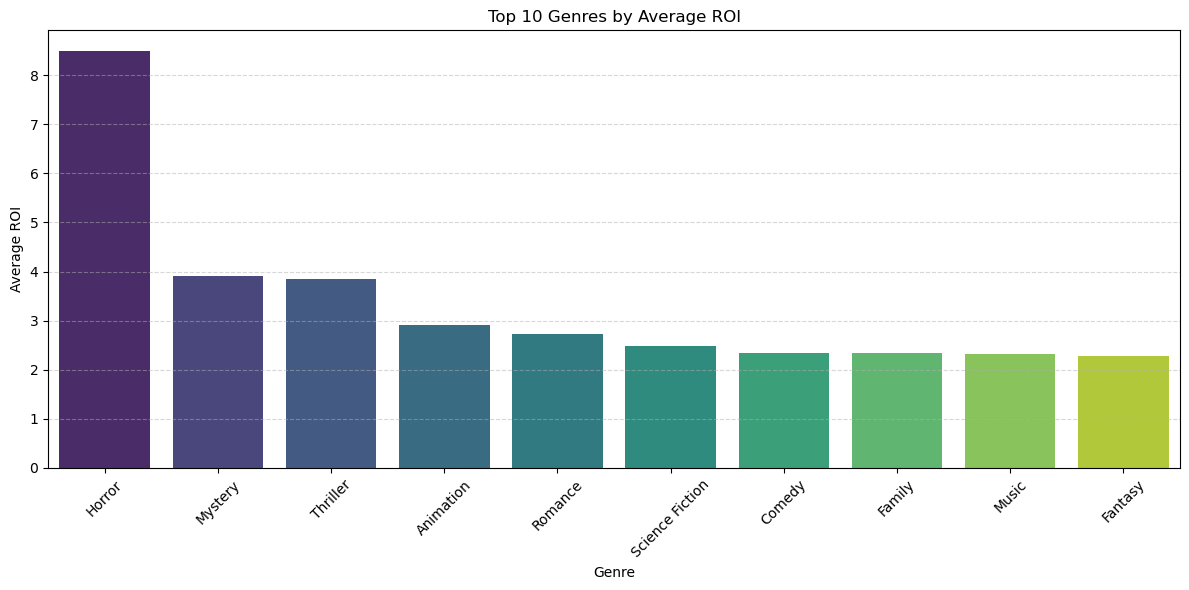

In [13]:
 #Calculate ROI for each movie
tmdb_tn_cleaned['roi'] = (tmdb_tn_cleaned['worldwide_gross'] - tmdb_tn_cleaned['production_budget']) / tmdb_tn_cleaned['production_budget']

# Group by genre and calculate average ROI
roi_by_genre = tmdb_tn_cleaned.groupby('genre')['roi'].agg(['mean', 'median', 'count']).reset_index()
roi_by_genre = roi_by_genre.sort_values(by='mean', ascending=False)

# Plotting  and visualization
roi_by_genre = tmdb_tn_cleaned.groupby('genre')['roi'].agg(['mean', 'median', 'count']).reset_index()
roi_by_genre = roi_by_genre.sort_values(by='mean', ascending=False)

# Plot top 10 genres by mean ROI
top_10 = roi_by_genre.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='genre', y='mean', palette='viridis')

plt.title('Top 10 Genres by Average ROI')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


The bar plot shows that horror movies has the highest  ROI. This means that it is the most succesful performing film genre the film industry.

### *2.Investigating the relationship Between Production Budget and Movie profitability.
The purpose of this objective is to understand how much money a movie studio should invest in film production in order to maximize profitability. By examining the relationship between a film's production budget and its financial success, we can determine the which budget has more profit compared to its ROI

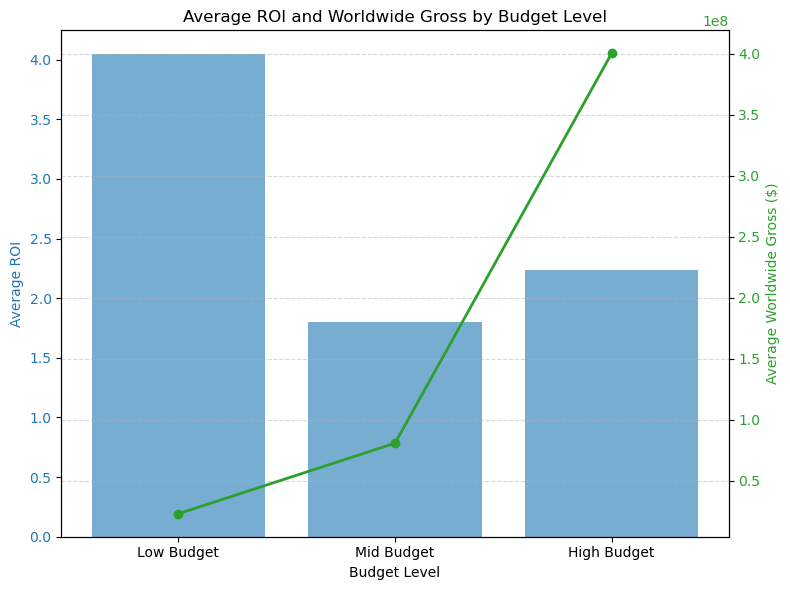

In [14]:

# Create ranges to be defined
tmdb_tn_cleaned['budget_level'] = pd.qcut(
    tmdb_tn_cleaned['production_budget'],
    q=3,
    labels=['Low Budget', 'Mid Budget', 'High Budget']
)

budget_analysis = tmdb_tn_cleaned.groupby('budget_level',observed=True).agg(
    avg_budget=('production_budget', 'mean'),
    avg_gross=('worldwide_gross', 'mean'),
    avg_roi=('roi', 'mean'),
    count=('title_clean', 'count')
).reset_index()


#Visualization
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar for Average ROI
color1 = 'tab:blue'
ax1.set_xlabel('Budget Level')
ax1.set_ylabel('Average ROI', color=color1)
ax1.bar(budget_analysis['budget_level'], budget_analysis['avg_roi'], color=color1, alpha=0.6, label='Average ROI')
ax1.tick_params(axis='y', labelcolor=color1)

# Secondary axis for Average Gross
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Average Worldwide Gross ($)', color=color2)
ax2.plot(budget_analysis['budget_level'], budget_analysis['avg_gross'], color=color2, marker='o', linewidth=2, label='Average Gross')
ax2.tick_params(axis='y', labelcolor=color2)

# Titles and layout
plt.title('Average ROI and Worldwide Gross by Budget Level')
fig.tight_layout()
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
plt.show()


NOW, the Avarage ROI and WorldWide Gross by Budget level analysis shows that, the  low-budget films outperform  big-budget films in ROI. The mid-budget.  

### *3. Identify the best time to release films*

In order to analyse the best timing for releasing a movie in a film industry, we used  top 5 genres by the world-gross for clear insight. The aim is to determine which month of the year or trends troughout the year  for proper  timing of film release.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


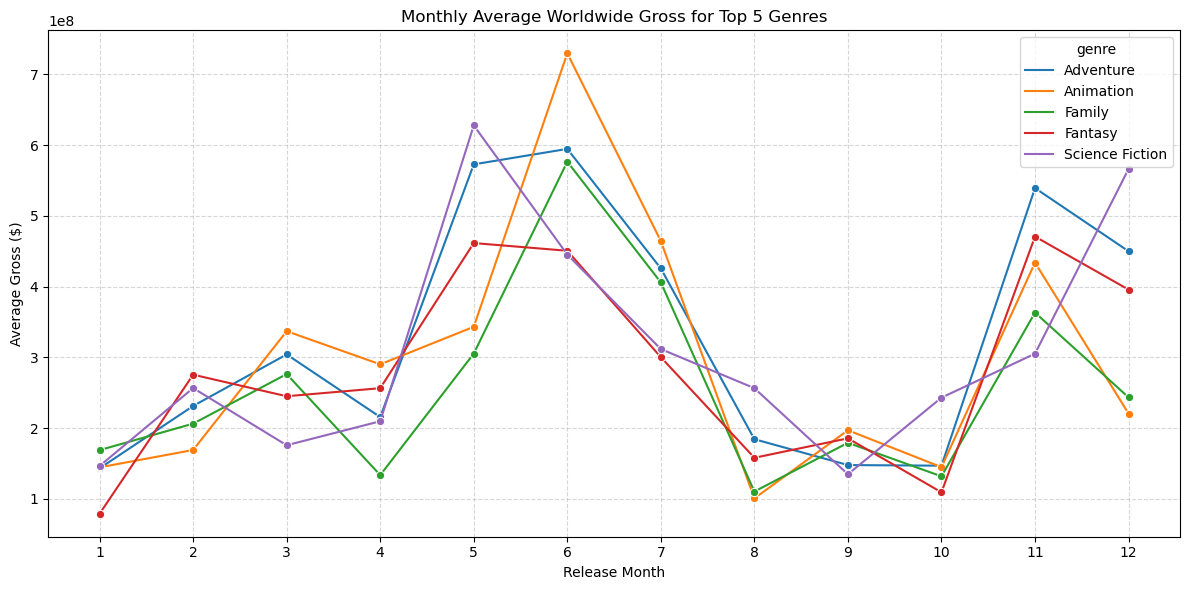

In [15]:
# Group by genre and month to compute average worldwide gross
monthly_gross = tmdb_bom_clean.groupby(['genre', 'month'], observed=True).agg(
    avg_gross=('worldwide_gross', 'mean'),
    movie_count=('title_clean', 'count')
).reset_index()

#  Ensure month is sorted properly (1–12)
monthly_gross['month'] = monthly_gross['month'].astype(int)
#5 genres by overall average gross
top_genres = (
    monthly_gross.groupby('genre')['avg_gross']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)
#  Filter to top 5 genres
top5_monthly_gross = monthly_gross[monthly_gross['genre'].isin(top_genres)]

#Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=top5_monthly_gross, x='month', y='avg_gross', hue='genre', marker='o')
plt.title('Monthly Average Worldwide Gross for Top 5 Genres')
plt.xlabel('Release Month')
plt.ylabel('Average Gross ($)')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


From the lineplot observation, it shows that when a film is released  on April, the Avarage gross tends to increase and on June the Avarage gross is at the peak. And tends to decrease steadly. We see also that between october and Novenber, the avarage gross increases also. 

### *4.Assesing the relationship between the Popularity and votecount vs Box office Performance*

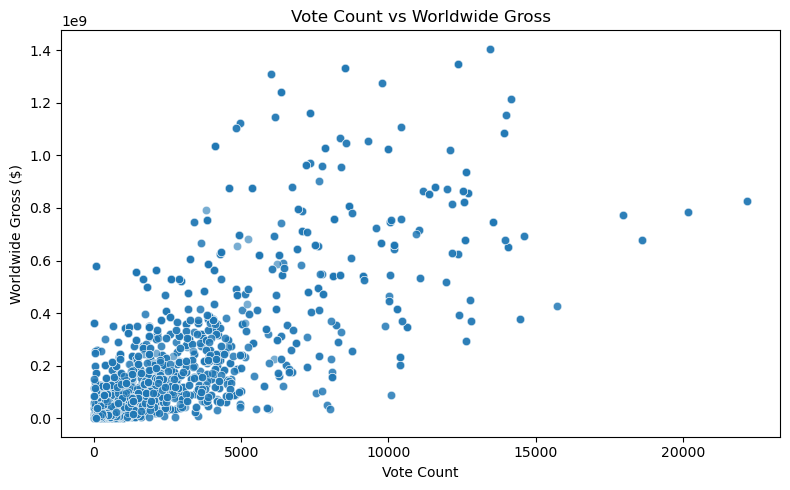

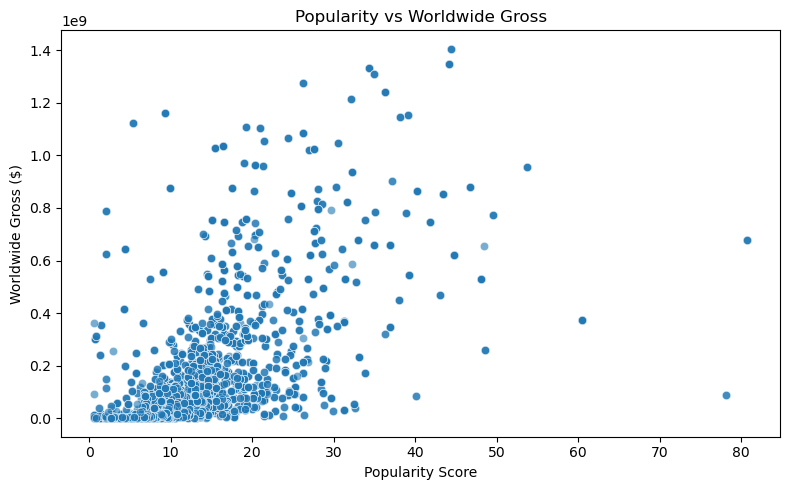

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Vote Count vs Worldwide Gross
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tmdb_bom_clean, x='vote_count', y='worldwide_gross', alpha=0.6)
plt.title('Vote Count vs Worldwide Gross')
plt.xlabel('Vote Count')
plt.ylabel('Worldwide Gross ($)')
plt.tight_layout()
plt.show()

# Scatter plot: Popularity vs Worldwide Gross
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tmdb_bom_clean, x='popularity', y='worldwide_gross', alpha=0.6)
plt.title('Popularity vs Worldwide Gross')
plt.xlabel('Popularity Score')
plt.ylabel('Worldwide Gross ($)')
plt.tight_layout()
plt.show()

In [17]:
# correlation
corr_data = tmdb_bom_clean[['popularity', 'vote_count', 'worldwide_gross']]

# Compute correlation matrix
correlation = corr_data.corr()

print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 popularity  vote_count  worldwide_gross
popularity         1.000000    0.677086         0.616774
vote_count         0.677086    1.000000         0.775961
worldwide_gross    0.616774    0.775961         1.000000


The  vote_count and the popularity has a correlation greater tha 0.5.
This means that there is a positve relationship between vote and  worlwide gross revenue and also there is a positive relationship between vote counyt and worlwide gross revenue.
it implies that:Highly discussed or well-rated films tend to perform better financially.
Marketing and buzz generation (viral trailers, fan base, etc.) may have real financial payoff.
If vote_count or popularity has a strong positive correlation with worldwide_gross, it implies that:

